# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Correlation
### VIDEO: Correlation coefficient
#### TEACHER: Mike X Cohen, sincxpress.com

In [3]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

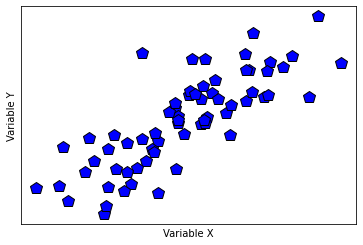

In [4]:
## simulate data

N = 66

# generate correlated data
x = np.random.randn(N)
y = x + np.random.randn(N)

# plot the data
plt.plot(x,y,'kp',markerfacecolor='b',markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
## compute covariance

# precompute the means
meanX = np.mean(x)
meanY = np.mean(y)

### the loop method
covar1 = 0
for i in range(N):
    covar1 = covar1 + (x[i]-meanX)*(y[i]-meanY)
    

# and now for the normalization
covar1 = covar1/(N-1)

### the linear algebra method
xCent = x-meanX
yCent = y-meanY
covar2 = np.dot(xCent,yCent) / (N-1)

### the Python method
covar3 = np.cov(np.vstack((x,y)))

print(covar1,covar2,covar3)

1.3855314795464748 1.3855314795464748 [[1.25329575 1.38553148]
 [1.38553148 2.36856011]]


In [6]:
covar3[0][1]

1.385531479546475

In [7]:
## now for correlation

### the long method
corr_num = sum( (x-meanX) * (y-meanY) )
corr_den = sum((x-meanX)**2) * sum((y-meanY)**2)
corr1 = corr_num/np.sqrt(corr_den)


### the Python method
corr2 = np.corrcoef(np.vstack((x,y)))

print(corr1,corr2)
print(corr2[0][1])

0.8041691521986448 [[1.         0.80416915]
 [0.80416915 1.        ]]
0.8041691521986449


In [8]:
## correlation as normalized covariance

xn = stats.zscore(x,ddof=1)
yn = stats.zscore(y)

corr3 = np.dot(xn,yn) / (N-1)

print(corr3)

0.8103314580415235


<ipython-input-9-6c7d4ead192a>:18: RuntimeWarning: divide by zero encountered in double_scalars
  tmatrix[ri,ni] = num/den
<ipython-input-9-6c7d4ead192a>:19: RuntimeWarning: divide by zero encountered in double_scalars
  pmatrix[ri,ni] = 1-stats.t.cdf(abs(num/den),n[ni]-2)


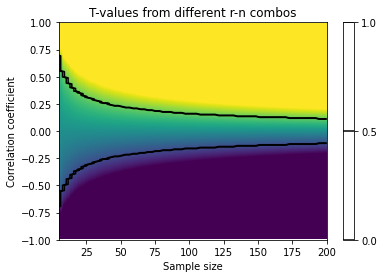

In [9]:
## 2D t-value space based on r and n

# define parameters
r = np.linspace(-1,1,248)
n = np.round( np.linspace(5,200,73) )

# initialize t-value matrix
tmatrix = np.zeros((len(r),len(n)))
pmatrix = np.zeros((len(r),len(n)))

for ri in range(len(r)):
    for ni in range(len(n)):
        
        # the t-value, split into num/den
        num = r[ri]*np.sqrt(n[ni]-2)
        den = 1-r[ri]**2
        
        tmatrix[ri,ni] = num/den
        pmatrix[ri,ni] = 1-stats.t.cdf(abs(num/den),n[ni]-2)

        
        
# Soooo curious to see it!
plt.imshow(tmatrix,vmin=-3,vmax=3,extent=[n[0],n[-1],r[0],r[-1]],aspect='auto',origin='lower')
plt.contour(pmatrix<.05,1,colors='k',extent=[n[0],n[-1],r[0],r[-1]])
plt.xlabel('Sample size')
plt.ylabel('Correlation coefficient')
plt.title('T-values from different r-n combos')
plt.show()

# question: Why the warning message?

In [10]:
# final note on statistical significance

r,p = stats.pearsonr(x,y)
print(r,p)

0.8041691521986449 4.259394052226527e-16
